In [79]:
%load_ext autoreload
%autoreload 2
import casperfpga
import helper
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
zrf16 = casperfpga.CasperFpga('192.168.50.64')
zrf16.is_connected()

True

In [100]:
zrf16.upload_to_ram_and_program('rfdc_test.fpg')
zrf16.listdev()

['dac1_ram_dn',
 'dac1_ram_up',
 'rfdc',
 'snapshot_ctrl',
 'snapshot_m00_ss_bram',
 'snapshot_m00_ss_ctrl',
 'snapshot_m00_ss_status',
 'snapshot_m10_ss_bram',
 'snapshot_m10_ss_ctrl',
 'snapshot_m10_ss_status',
 'snapshot_m20_ss_bram',
 'snapshot_m20_ss_ctrl',
 'snapshot_m20_ss_status',
 'snapshot_m30_ss_bram',
 'snapshot_m30_ss_ctrl',
 'snapshot_m30_ss_status',
 'snapshot_u1_ss_bram',
 'snapshot_u1_ss_ctrl',
 'snapshot_u1_ss_status',
 'snapshot_u2_ss_bram',
 'snapshot_u2_ss_ctrl',
 'snapshot_u2_ss_status',
 'sys',
 'sys_board_id',
 'sys_clkcounter',
 'sys_rev',
 'sys_rev_rcs',
 'sys_scratchpad']

In [101]:
test_bram = zrf16.sbrams['dac1_ram_up']

In [102]:
seq_len = int(test_bram.length_bytes/2)

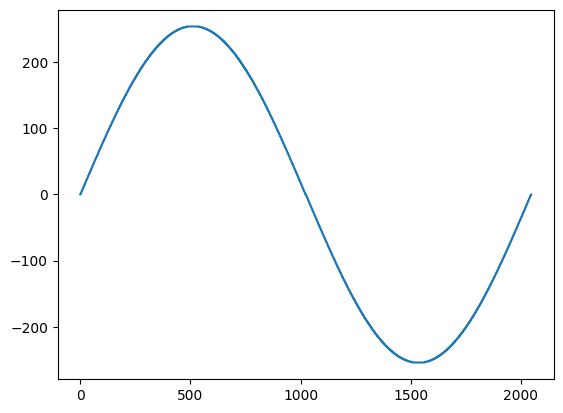

In [103]:
from scipy.signal import sawtooth
data_seq = np.sin(np.pi*2*np.linspace(0,1,seq_len))*255
# data_seq = sawtooth(np.pi*2*np.linspace(0,1,seq_len))*255
data_seq = np.array(data_seq,dtype=int)
# plt.plot(data_seq[:100])
plt.plot(data_seq)
data_seq = data_seq.tolist()
write_data = helper.packet_write_data(data_seq)

In [104]:
test_bram.write(write_data,True)

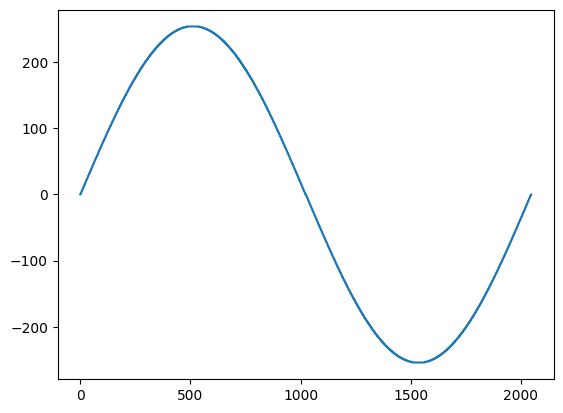

In [105]:
dat = test_bram.read_raw()[0]
read_data = helper.depacket_read_data(dat)
plt.plot(read_data)
# plt.plot(read_data[:100])

In [106]:
rfdc_zrf16 = zrf16.adcs['rfdc']
rfdc_zrf16.init()

True

In [107]:
rfdc_zrf16.status()

ADC0: Enabled 1, State: 15 PLL: 1
ADC1: Enabled 1, State: 15 PLL: 1
ADC2: Enabled 1, State: 15 PLL: 1
ADC3: Enabled 1, State: 15 PLL: 1


True

In [108]:
xm1, xm2, xm3, xm4 = helper.capture(zrf16)

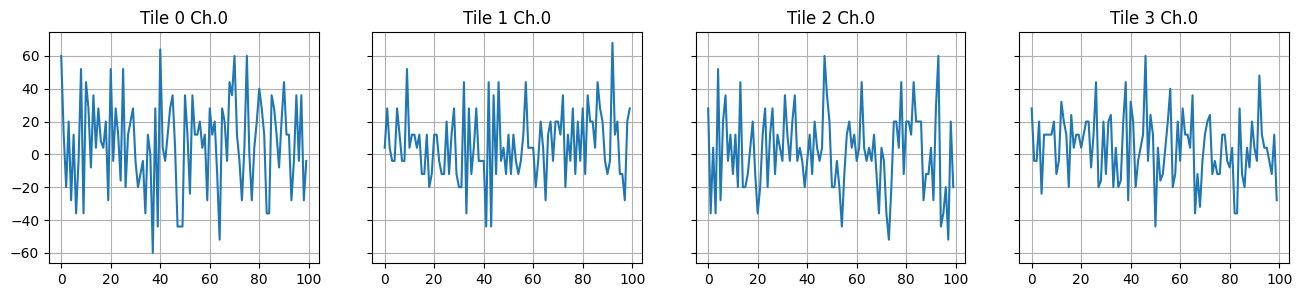

In [109]:
N = 100
n = np.arange(0,N)
fig, ax = plt.subplots(1,4,sharey=True,figsize=(16,3))
ax[0].plot(n, np.real(xm1[:N])); ax[0].set_title('Tile 0 Ch.0'); ax[0].grid(True);
ax[1].plot(n, np.real(xm2[:N])); ax[1].set_title('Tile 1 Ch.0'); ax[1].grid(True);
ax[2].plot(n, np.real(xm3[:N])); ax[2].set_title('Tile 2 Ch.0'); ax[2].grid(True);
ax[3].plot(n, np.real(xm4[:N])); ax[3].set_title('Tile 3 Ch.0'); ax[3].grid(True);

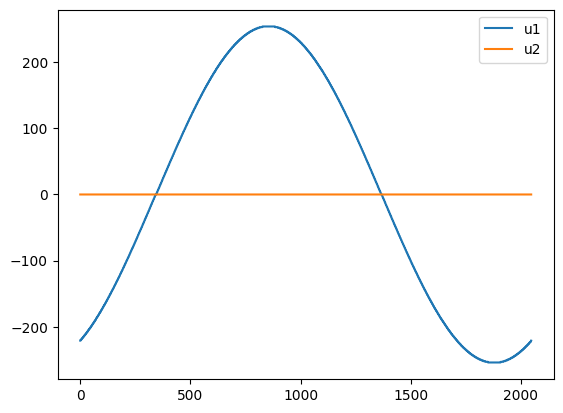

In [112]:
u_data = helper.capture_u(zrf16)
plt.plot(u_data[0][:seq_len])
plt.plot(u_data[1][:seq_len])
plt.legend(['u1','u2'])